<a href="https://colab.research.google.com/github/ABeleris/EKPA/blob/main/cyberthreathunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-09a2510731eb>:37: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Ακρίβεια (Accuracy): 0.9995611109160493
Precision: 0.974025974025974
Recall: 0.7653061224489796
F1 Score: 0.8571428571428571


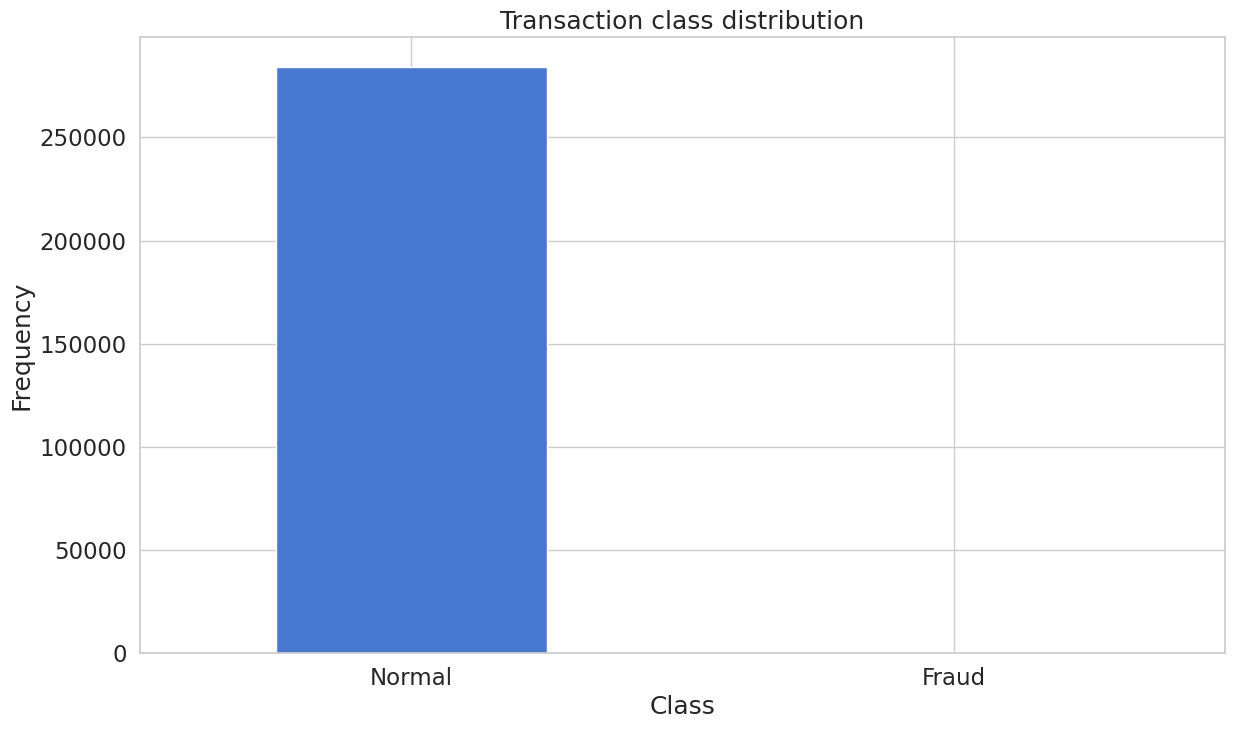

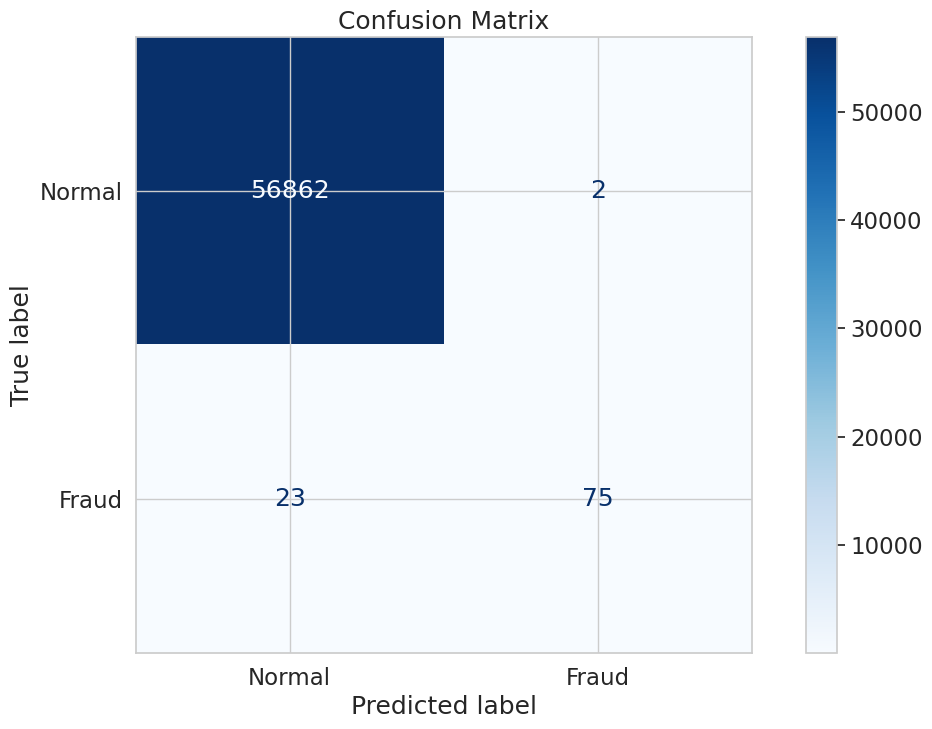

In [ ]:

# φόρτωση βιβλιοθηκών
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # Import precision_score, recall_score, f1_score, and confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import ConfusionMatrixDisplay # Import ConfusionMatrixDisplay
%matplotlib inline

# έλεγχος κατανομής κλάσεων
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# φόρτωση συνόλου δεδομένων
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
data = pd.read_csv(url)

#εκτύπωση (δικό μου section για να δώ τις κατηγορίες)
#print(data.head())

# διαγραφή κενών ή μη αριθμητικών τιμών
data = data.select_dtypes(include=['float64', 'int64']).dropna()

# διαχωρισμός ανεξάρτητων και εξαρτημένων μεταβλητών
X = data.drop('Class', axis=1)        # Όλες οι στήλες εκτός από την 'Class'
y = data['Class']                     # Στόχος (target) είναι η στήλη 'Class'

# διαχωρισμός συνόλου δεδομένων σε σύνολο εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# κατανομή της εξαρτημένης μεταβλητής (class)
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

# δημιουργία Random Forest αλγορίθμου
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)

# εκπαίδευση αλγόριθμου
rf_classifier.fit(X_train, y_train)

# πρόβλεψη συνόλου δοκιμής
y_pred = rf_classifier.predict(X_test)

# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Εμφάνιση των μετρικών
print("Ακρίβεια (Accuracy):", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Υπολογισμός και απεικόνιση confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=LABELS)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()